<a href="https://colab.research.google.com/github/venupinnamareddy/venu/blob/main/dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

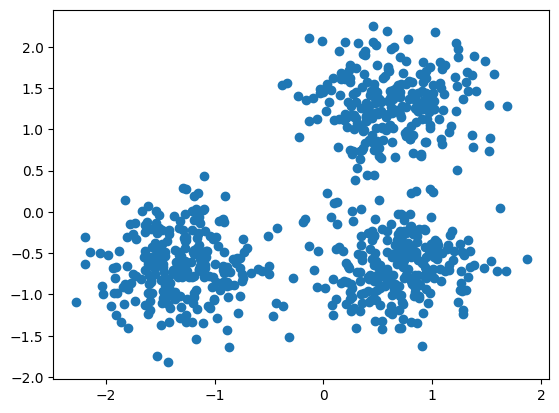

Estimated number of clusters: 3
Estimated number of noise points: 18


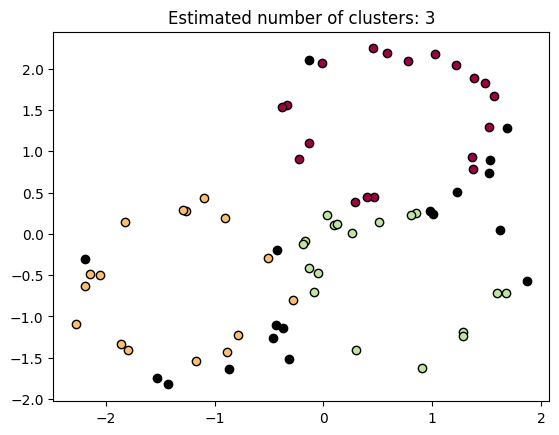

In [1]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Corrected centers format
centers = [[1, 1], [-1, -1], [1, -1]]
x, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)
x = StandardScaler().fit_transform(x)





import matplotlib.pyplot as plt

plt.scatter(x[:, 0], x[:, 1])
plt.show()



import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=0.3, min_samples=10).fit(x)
# Use 'labels_' instead of 'labels_true' to get the predicted labels
labels = db.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters)
print("Estimated number of noise points: %d" % n_noise)




unique_labels = set(labels)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
        # Assign class_member_mask inside the if block
        class_member_mask = (labels == k)
        # Indent the following line to be inside the if block
        xy = x[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)
    # Indent the following lines to be inside the for loop but outside the if block
    # Use class_member_mask instead of xy which was not assigned before
    class_member_mask = (labels == k)
    xy = x[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters)
plt.show()





